# Odhad parametrů gama rozdělení metodou maximální věrohodnosti

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma, digamma, loggamma


In [2]:
# skutecne parametry pro simulaci
alfaT = 2
betaT = 5

# pocet vzorku
n = 100

# data
x = np.random.gamma(alfaT, 1/betaT, size=n)

$s:=\sum_{i=1}^n x_i$

$t:=\sum_{i=1}^n\ln(x_i)$

$l(\alpha, \beta)=n(\alpha\ln\beta-\ln\Gamma(\alpha))+(\alpha-1)t-\beta(s)$

In [3]:
# hodnoty statistik
s = np.sum(x)
t = np.sum(np.log(x))

$\frac{\partial l(\alpha, \beta)}{\partial\alpha} = n\ln\beta-n\psi(\alpha)+t$

$\frac{\partial l(\alpha, \beta)}{\partial\beta} = n\frac{\alpha}{\beta}-s$

Z rovnice $\frac{\partial l(\alpha, \beta)}{\partial\beta} = 0$ vyjádříme $\beta=\frac{n}{s}\alpha$ a dosadíme do $\frac{\partial l(\alpha, \beta)}{\partial\alpha} = 0$.

$\alpha$ pak hledáme jako řešení rovnice $$n\ln\left(\frac{n}{s}\alpha\right)-n\psi(\alpha)+t=0.$$

Rovnici řešíme numericky. Použijeme metodu půlení intervalů.

In [4]:
# l(a, n*alfa/beta-s)$
def Lalpha(alfa):
    return n*(alfa*np.log(n/s*alfa)-loggamma(alfa))+(alfa-1)*t-n*alfa


Text(0, 0.5, '$l(\\alpha, \\frac{n}{s}{\\alpha})$')

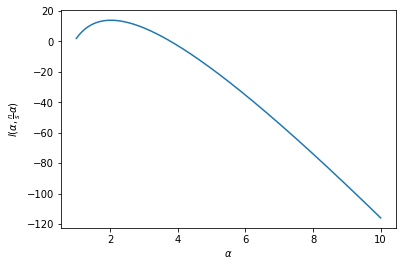

In [5]:
xs = np.linspace(1, 10, 200)
plt.plot(xs, Lalpha(xs))
plt.xlabel('$\\alpha$')
plt.ylabel('$l(\\alpha, \\frac{n}{s}{\\alpha})$')

In [6]:
def fun(a):
    return n*np.log(n/s*a)-n*digamma(a)+t

Text(0, 0.5, '$\\frac{\\partial l}{\\partial\\alpha}\\left(\\alpha, \\frac{n}{s}\\alpha\\right)$')

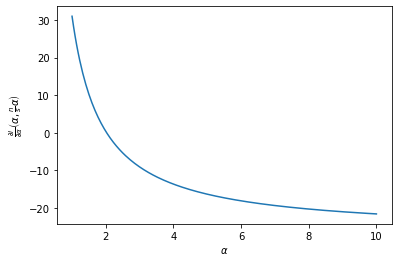

In [7]:
plt.plot(xs, fun(xs))
plt.xlabel('$\\alpha$')
plt.ylabel('$\\frac{\\partial l}{\\partial\\alpha}\\left(\\alpha, \\frac{n}{s}\\alpha\\right)$')

In [8]:
# metoda puleni intervalu
# hleda reseni f(x)=0 v intervalu <xa, xb> s presnosti eps
def puleni(xa, xb, f, eps):
    if (f(xa)*f(xb))>0:
        return "fuj"
    a = xa
    b = xb
    while (b-a)>eps:
        c = 0.5*(a+b)
        if (f(a)*f(c))>0:
            a=c
        else:
            b=c
    return 0.5*(a+b)

In [9]:
# maximalne verohodny odhad
alphaML = puleni(1, 10, fun, 1e-6)
betaML = n/s*alphaML 



In [10]:
# odhad metodou momentu
m1 = np.mean(x)
m2 = np.mean(x**2)

alphaMM = m1**2/(m2-m1**2)
betaMM = m1/(m2-m1**2)

In [11]:
print('ML odhad: ', alphaML, betaML)
print('MM odhad: ', alphaMM, betaMM)

ML odhad:  2.023642271757126 5.612071180592968
MM odhad:  1.5910042880204793 4.41225676969412
